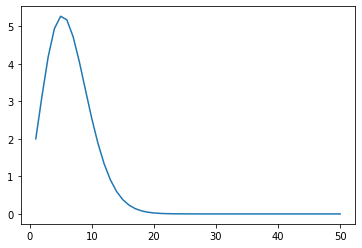

In [4]:
# volume of a unit hypersphere

import numpy as np
from scipy.special import gamma, factorial
import matplotlib.pyplot as plt


def volume_hypersphere(d):
    r = np.power(np.pi, d / 2) / gamma((d / 2) + 1)
    return r
    
vfunc = np.vectorize(volume_hypersphere)
x = np.arange(1, 51)
y = vfunc(x)

plt.plot(x, y)
plt.show()

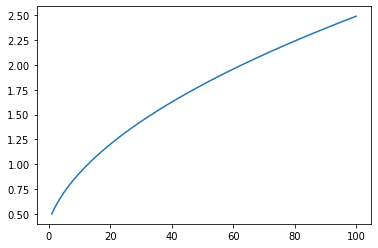

In [6]:
# unit volume

def unit_volume_radius(d):
    r = gamma((d / 2) + 1) / np.power(np.pi, d / 2)
    return np.power(r, 1.0/d)

vfunc = np.vectorize(unit_volume_radius)
x = np.arange(1, 101)
y = vfunc(x)

plt.plot(x, y)
plt.show()

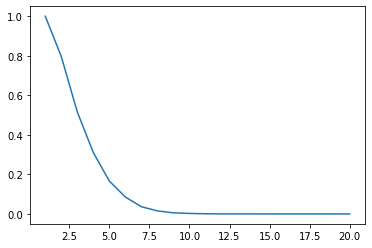

In [19]:

def fraction_sphere_inscripted_into_hypercube_volume(d):
    points = np.random.uniform(low=-1.0, high=1.0, size=(10000, d))
    r = np.apply_along_axis(np.linalg.norm, 1, points)
    return ((r <= 1.0).sum()) / 10000.0
    
vfunc = np.vectorize(fraction_sphere_inscripted_into_hypercube_volume)
x = np.arange(1, 21)
y = vfunc(x)


plt.plot(x, y)
plt.show()

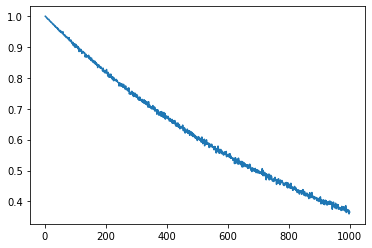

In [48]:
eps = 0.001

def proj(e):
    if np.any((e > 1 - eps) | (e < -1 + eps)):
        return 0
    return 1

def fraction_of_shell_volume(d):
    points = np.random.uniform(low=-1.0, high=1.0, size=(10000, d))
    r = np.apply_along_axis(proj, 1, points)
    return r.sum() / 10000.0
    
vfunc = np.vectorize(fraction_of_shell_volume)
x = np.arange(1, 1001)
y = vfunc(x)


plt.plot(x, y)
plt.show()

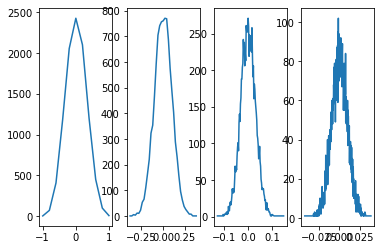

In [64]:
def generate_diag(n, d):
    data = np.random.randint(low=0, high=2, size=(n, d))
    data[data == 0] = -1
    return data

def generate_pairs(d):
    def generate_diag(d):
        data = np.random.randint(low=0, high=2, size=(2, d))
        data[data == 0] = -1
        return data
    return generate_diag(d)


def compuate_angle(d):
    angles = np.zeros(10000)
    for i in range(10000):
        data = generate_pairs(d)
        angles[i] = np.dot(data[0], data[1]) / (d + 0.0)
    return angles

r = compuate_angle(10)
x10, y10 = np.unique(r, return_counts=True)

r = compuate_angle(100)
x100, y100 = np.unique(r, return_counts=True)

r = compuate_angle(1000)
x1k, y1k = np.unique(r, return_counts=True)

r = compuate_angle(10000)
x10k, y10k = np.unique(r, return_counts=True)

fig, ax = plt.subplots(1, 4)

ax[0].plot(x10, y10)
ax[1].plot(x100, y100)
ax[2].plot(x1k, y1k)
ax[3].plot(x10k, y10k)
plt.show()

In [68]:
print(x10k.sum() / 10000.0)
print(x1k.sum() / 1000.0)
print(x100.sum() / 100.0)
print(x10.sum() / 10.0)

-7.43999999999998e-06
0.0002720000000000002
-0.0036
2.2204460492503132e-17
